In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
df = pd.read_csv('Social_Network_Ads.csv')

In [160]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [161]:
df = df.iloc[:,2:]

In [162]:
df.sample(5)

,Age,EstimatedSalary,Purchased
232,40,107000,1
150,26,15000,0
206,55,130000,1
271,59,76000,1
128,30,17000,0


# Train Test Split

In [164]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis = 1),
                df['Purchased'],
                test_size = 0.3,
                random_state = 0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

# Standard Scaler

In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fit the scaler to the train set, it will learn the parameters
#learning from train set and transforming both
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [167]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [226]:
#standard scaler returns np array
#we convert it to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [228]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [230]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

Text(0.5, 1.0, 'After Scaling')

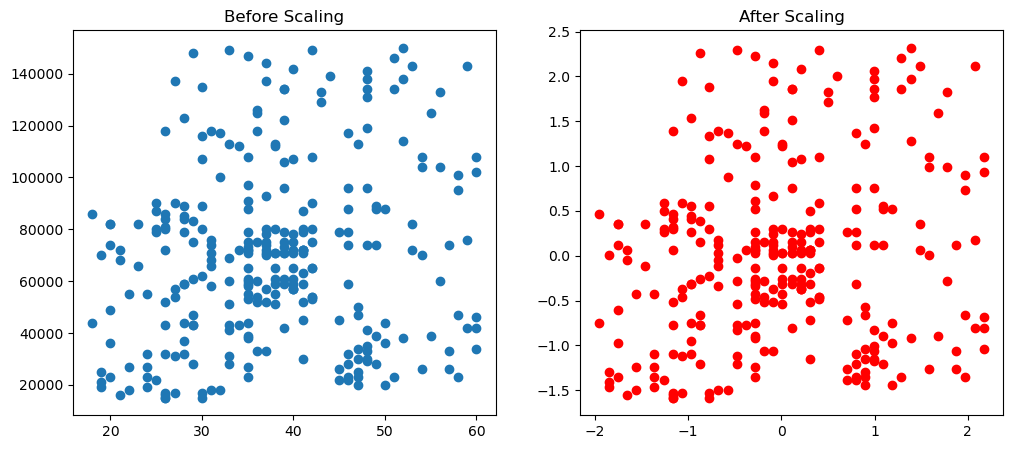

In [233]:
fig,(ax1,ax2) = plt.subplots(ncols = 2 , figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')

<Axes: title={'center': 'After Standard Scaling'}, xlabel='Age', ylabel='Density'>

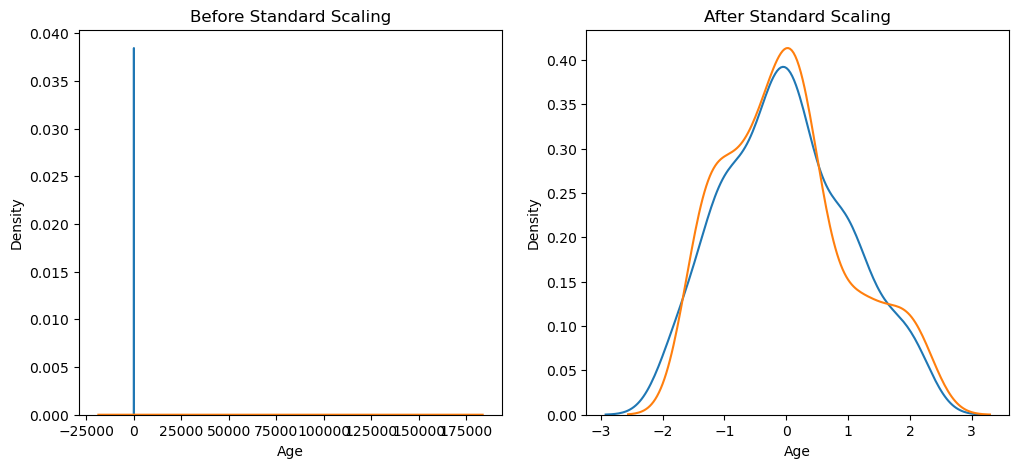

In [234]:
fig,(ax1,ax2) = plt.subplots(ncols = 2 , figsize=(12,5))

#before
ax1.set_title('Before Standard Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#after
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
#both didtributions are now comparable

<Axes: title={'center': 'After scaling'}, xlabel='Age', ylabel='Density'>

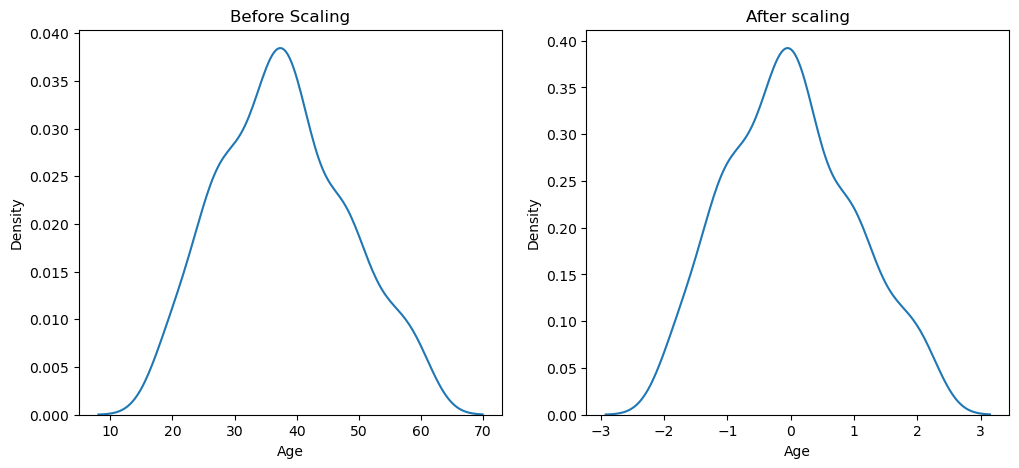

In [235]:
#AGE
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
#before
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)

#after
ax2.set_title('After scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
#distribution retained only scale changed !

<Axes: title={'center': 'After'}, xlabel='EstimatedSalary', ylabel='Density'>

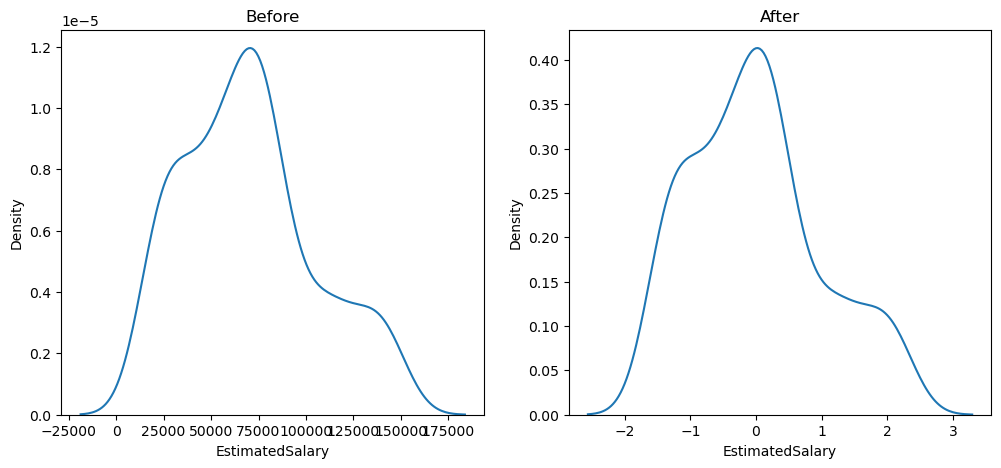

In [236]:
#SALARY
fig,(ax1,ax2) = plt.subplots(ncols = 2 ,figsize=(12,5))

#before
ax1.set_title('Before')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
#after
ax2.set_title('After')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

# why is scaling important ?

In [239]:
from sklearn.linear_model import LogisticRegression

In [241]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [243]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [244]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [247]:
from sklearn.metrics import accuracy_score

In [252]:
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred_scaled))

0.875
0.8666666666666667


# Effect of outliers

In [267]:
df = pd.concat([df,pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})])

In [269]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
0,5,1000,0
1,90,250000,1


In [281]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state = 0)

In [305]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [303]:
X_train_scaled

,Age,EstimatedSalary
0,-0.652473,-0.995561
1,1.903047,2.092697
2,-0.104862,1.922701
3,-0.652473,0.562734
4,-0.013593,-0.287245
...,...,...
277,0.899092,-1.108891
278,-0.835010,-0.740567
279,-0.196130,-0.485573
280,-1.017547,-0.428908


Text(0.5, 1.0, 'After Scaling')

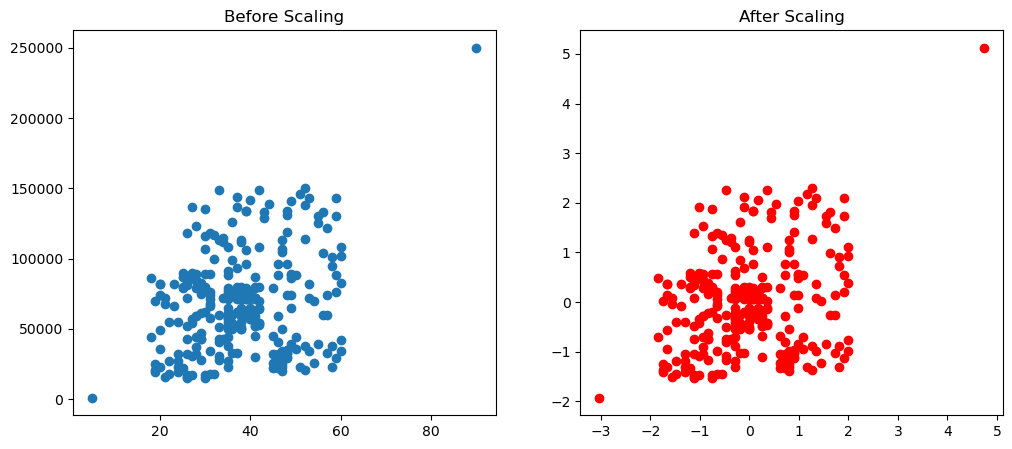

In [307]:
fig,(ax1,ax2) = plt.subplots(ncols = 2 , figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
#still outlier remain same
#they need to be handled explicitly